<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%202%20DL%20Image%20Analysis%201/LeNetNew_Sln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New version of LeNet CNN using 'same' padding, and ReLU activation function

In [ ]:
from tensorflow.keras.datasets import mnist

# download mnist data and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# data pre-processing - we need to reshape to specify a channel of 1 on the end of the
# data to signify that there is one channel as it is a grayscale image
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# one-hot encode the train and test target columns
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(2))
model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu'))
model.add(AveragePooling2D(2))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))
model.summary()

# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

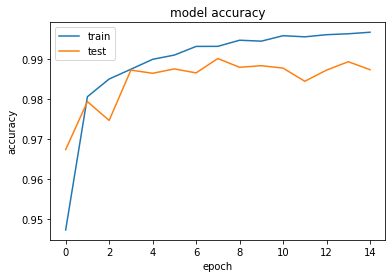

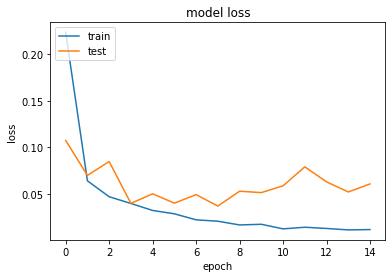

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()